# Predicción de diabetes

In [2]:
! pip install imblearn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 10.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_text
import numpy as np
from numpy.random import seed, choice
from collections import Counter
from sklearn.datasets import load_breast_cancer


In [4]:
# Cargamos los datos como un dataframe
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
duplicates = df.duplicated()

total_duplicates = duplicates.sum()

total_duplicates

0

In [6]:
# Total de registros y variables
print('El dataset se compone de un total de {} mediciones de pacientes y un total de {} características.'.format(*df.shape))

El dataset se compone de un total de 768 mediciones de pacientes y un total de 9 características.


In [7]:
# Vemos que el dataset tiene más casos negativos que positivos.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

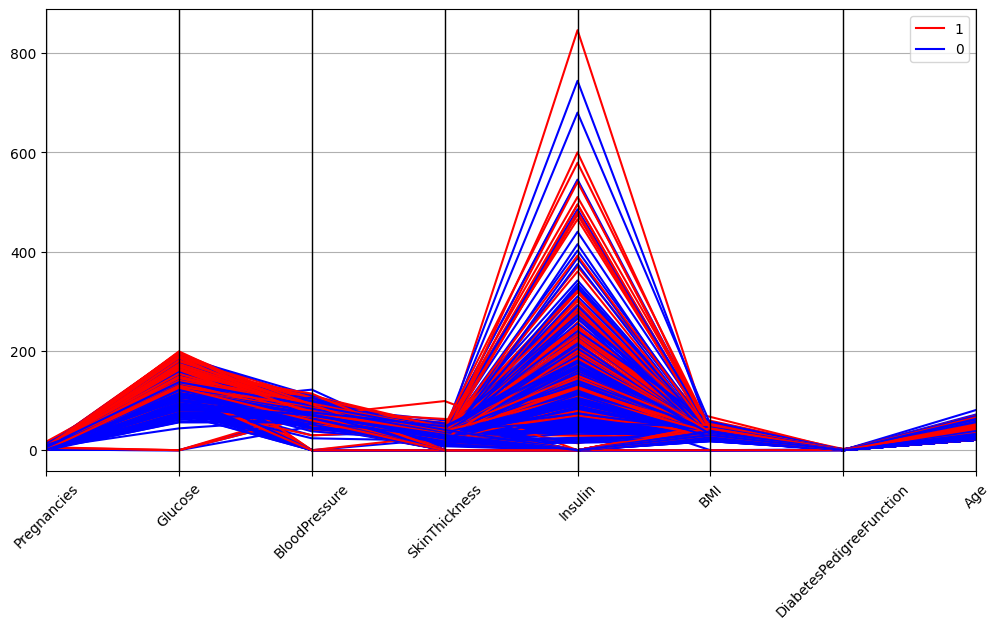

In [8]:
# Visualizamos la relación entre las características de nuestro dataset
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

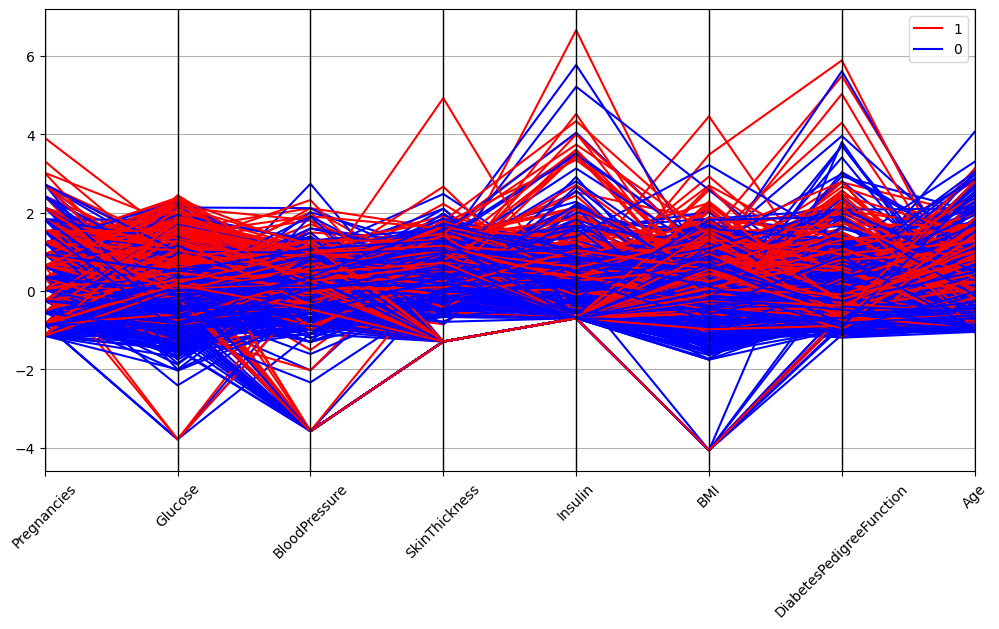

In [9]:
# Visualizamos la relación entre las características de nuestro dataset escalado
data_sc = pd.DataFrame(data=StandardScaler().fit_transform(df.drop(['Outcome'], axis=1)), columns=df.columns[:-1])
data_sc['Outcome'] = df.Outcome
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['red', 'blue'])
plt.xticks(rotation=45)
plt.show()

Se aprecia que en las variables 'Glucose' y 'BMI' es donde más se consentra la relación de las caracteristicas.

In [10]:
# Procedemos a generar los conjuntos de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [11]:
# Crear un árbol de decisión complejo
complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

# Crear un árbol de decisión simple
simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, random_state=42)
simple_tree.fit(X_train, y_train)

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

In [12]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [13]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000,1.000000,1.000000
Test,0.746753,0.672269,0.742424,0.625,0.727273,0.757576
Diferencia,0.253247,0.327731,0.257576,0.375,0.272727,0.242424


El modelo esta aprendiendo el cual no es recomendable.


In [14]:
# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.737785,0.663883,0.739823,0.597744,0.746479,0.733167
Test,0.636364,0.594203,0.660606,0.493976,0.745455,0.575758
Diferencia,0.101421,0.069680,0.079217,0.103768,0.001024,0.157410


In [15]:
# Matriz de confusión
confusion_matrix(y_test, test_pred_simple)

array([[57, 42],
       [14, 41]])

- **57 Verdaderos Positivos (VP)**: El modelo predijo correctamente la clase positiva 57 veces.
- **42 Falsos Positivos (FP)**: El modelo predijo incorrectamente la clase positiva 42 veces.
- **14 Falsos Negativos (FN)**: El modelo predijo incorrectamente la clase negativa 14 veces cuando la verdadera clase era positiva.
- **41 Verdaderos Negativos (VN)**: El modelo predijo correctamente la clase negativa 41 veces.


In [16]:
# Interpretación del árbol simple en texto plano
text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Age <= 28.50
|   |--- Glucose <= 127.50
|   |   |--- BMI <= 30.95
|   |   |   |--- class: 0
|   |   |--- BMI >  30.95
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 1
|--- Age >  28.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 142.00
|   |   |   |--- class: 1
|   |   |--- Insulin >  142.00
|   |   |   |--- class: 1



Edad <= 28.5
Si la edad es menor o igual a 28.5 años, se sigue al siguiente nodo.

Glucosa <= 127.5
Si la glucosa es menor o igual a 127.5, se sigue al próximo nodo.

IMC <= 30.95
- Si el IMC es menor o igual a 30.95, se clasifica como clase 0.
- Si el IMC es mayor a 30.95, también se clasifica como clase 0.

Si la glucosa es mayor a 127.5, se sigue al próximo nodo.

Grosor de la piel <= 31.5
- Si el grosor de la piel es menor o igual a 31.5, se clasifica como clase 0.
- Si el grosor de la piel es mayor a 31.5, se clasifica como clase 1.

Edad > 28.5
Si la edad es mayor a 28.5 años, se sigue al siguiente nodo.

IMC <= 27.85
Si el IMC es menor o igual a 27.85, se sigue al próximo nodo.

Glucosa <= 123.0
- Si la glucosa es menor o igual a 123.0, se clasifica como clase 0.
- Si la glucosa es mayor a 123.0, también se clasifica como clase 0.

Si el IMC es mayor a 27.85, se sigue al próximo nodo.

Insulina <= 142.0
- Si la insulina es menor o igual a 142.0, se clasifica como clase 1.
- Si la insulina es mayor a 142.0, también se clasifica como clase 1.


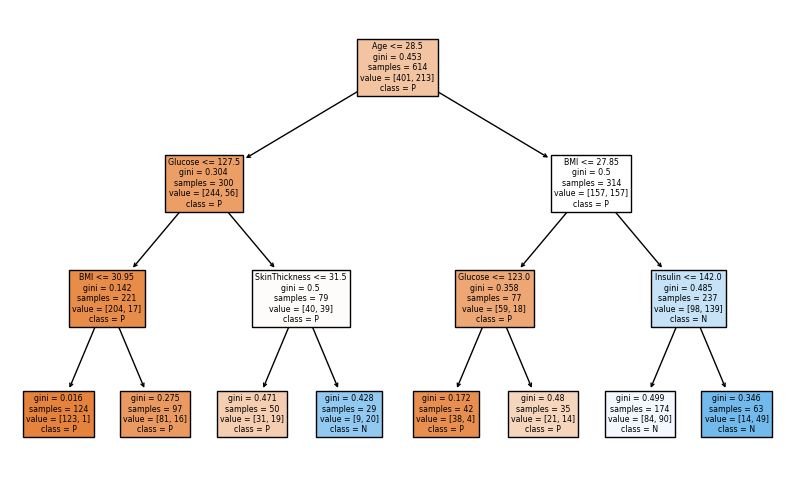

In [17]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['P','N'], filled=True)
plt.show()

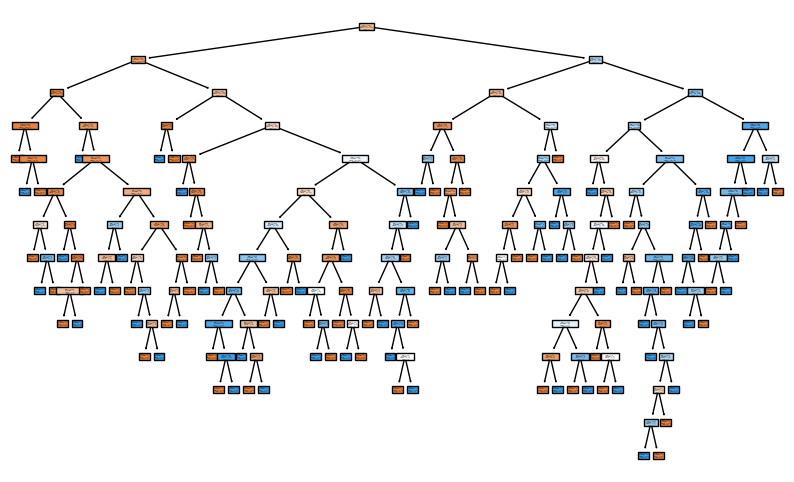

In [18]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(complex_tree, feature_names=X_train.columns, class_names=['N','D'], filled=True)
plt.savefig("Plot Arbol Complejo.png", dpi=500)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define el modelo de árbol de decisión
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [1,3,4,5, 8, 10],  # You can specify different values to search
    'max_features': [(X_train.shape[1] // 2) ,(X_train.shape[1] // 2) + 1, (X_train.shape[1] // 2) + 2],
    'min_samples_leaf': [3, 5, 10,15],
}
# Create the DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Create the optimal tree with the best hyperparameters
optimal_tree = DecisionTreeClassifier(**best_params, random_state=42)

In [20]:
optimal_tree.fit(X_train, y_train)
train_pred_optimal= optimal_tree.predict(X_train)
test_pred_optimal = optimal_tree.predict(X_test)
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [21]:
# Métricas del modelo optimizado
get_metrics(y_train, y_test, train_pred_optimal, test_pred_optimal)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.809446,0.672269,0.751765,0.833333,0.563380,0.940150
Test,0.759740,0.610526,0.708081,0.725000,0.527273,0.888889
Diferencia,0.049706,0.061743,0.043684,0.108333,0.036108,0.051261


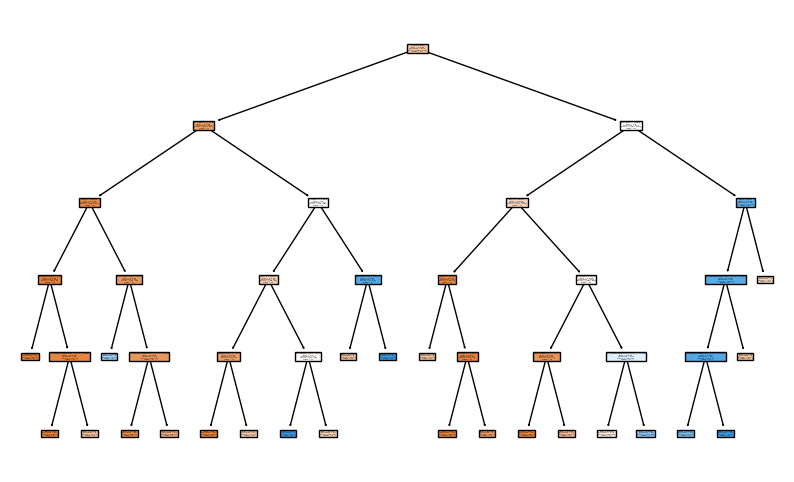

In [22]:
# Visualiza el árbol de decisión gráficamente
plt.figure(figsize=(10, 6))
plot_tree(optimal_tree, feature_names=X_train.columns, class_names=['N','D'], filled=True)
plt.savefig("Plot Arbol Optimizado.png", dpi=500)
plt.show()

In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Asumiendo que 'df' es tu DataFrame y que 'Outcome' es la columna objetivo.

# Dividir los datos en conjuntos de entrenamiento y de prueba
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador RandomForest
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(report)


Accuracy: 72.08%
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



PARA EL ANTERIOR RESULTADO:
- NOS PUEDE INDICAR QUE LA PRECISION DEL MODELO FUE DE UN 72.08% 
- LA CLASE 0 (NEGATIVA PARA DIABETES) EL MODELO TIENE UNA MEJOR PREDICCION DE ESTA, TENIENDO UN 79% DE PRECISION AL DETECTAR LA CLASE NEGATIVA Y EN UN 78% HA ACERTADO.
- Y LA CLASE 1 (POSITIVA PARA DIABETES) EL MODELO HA DETECTADO EL 61% Y HA ACERTADO EL 62%.
- TAMBIEN PODEMOS ENCONTRAR QUE MACRO AVG TIENE UN 70%. ESTO TOMA EN CUENTA EL DESEQUILIBRO DE CLASES QUE EN ESTE CASO SI LO HAY.

In [24]:
# Inicializamos GridSearchCV con el clasificador, la grilla de hiperparámetros y validación cruzada
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenamos GridSearchCV con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos el mejor clasificador luego de la búsqueda
best_rf = grid_search.best_estimator_

# Hacemos predicciones con el conjunto de prueba utilizando el mejor clasificador
y_pred = best_rf.predict(X_test)

# Evaluamos el modelo mejorado
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Mejor Random Forest Accuracy: {accuracy:.2%}")
print(report)
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[CV] END ....max_depth=1, max_features=4, min_samples_leaf=3; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=3; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=3; total time=   0.3s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=3; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=3; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....max_depth=1, max_features=4, min_samples_leaf=5; total time=   0.2s
[CV] END ...max_depth=1, max_features=4, min_samples_leaf=10; total time=   0.2s
[CV] END ...max_depth=1, max_features=4, min_samples_leaf=10; total time=   0.2s
[CV] END ...max_depth=1, max

In [25]:
# Instanciar el clasificador Random Forest con los mejores hiperparámetros encontrados
best_rf_classifier = RandomForestClassifier(
    max_depth=8,
    max_features=6,
    min_samples_leaf=10,
    random_state=42
)

# Entrenar el modelo con todo el conjunto de datos de entrenamiento
best_rf_classifier.fit(X_train, y_train)

# Ahora puedes usar best_rf_classifier para hacer predicciones, por ejemplo:
y_pred = best_rf_classifier.predict(X_test)

# Y evaluar el rendimiento del modelo con los mejores hiperparámetros encontrados
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the optimized model: {accuracy:.2%}")

# También puedes generar un reporte de clasificación para ver cómo se desempeña el modelo en cada clase
report = classification_report(y_test, y_pred)
print(report)


Accuracy of the optimized model: 77.92%
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        99
           1       0.68      0.73      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154



AL ENCONTAR LOS MEJORES HIPERPARAMETROS E INSTANCIARLO EN EL CLASIFICADOR TENEMOS QUE EL MODELO TUVO UNA PEQUEÑA MEJORA SOBRE TODO PARA LOS CASOS TIPO 0 (NEGATIVOS) PERO NADA NOTABLE.
 

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


In [27]:
# Crear el modelo AdaBoost con RandomForest como base
ada_boost = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=50, random_state=42)

# Entrenar el modelo AdaBoost con los datos de entrenamiento
ada_boost.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_boost = ada_boost.predict(X_test)

# Calcular la precisión del modelo AdaBoost
accuracy_boost = accuracy_score(y_test, y_pred_boost)
report_boost = classification_report(y_test, y_pred_boost)

print(f"Accuracy (AdaBoost): {accuracy_boost:.2%}")
print(report_boost)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (AdaBoost): 74.68%
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [33]:
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Mejores parámetros: {best_params}")
print(f"Mejor puntuación (accuracy): {best_score:.2%}")


/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home

Mejores parámetros: {'learning_rate': 0.01, 'n_estimators': 10}
Mejor puntuación (accuracy): 78.18%
